In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
def load_dic_bb_elements(path_bb_elements):
    l_bb_elements = []
    step = 0
    while True:
        path = path_bb_elements + f"bb_elements_step_{step}.pkl"
        if not os.path.exists(path):
            break
        else:
            with open(path, "rb") as f:
                bb_elements = pickle.load(f)
            l_bb_elements.append(bb_elements)
            step += 1
    return l_bb_elements



In [2]:
# Load simulation with 21 steps
l_bb_elements_21_true = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000/"
)

# Load simulation with 6 steps (21 steps due to interpolation)
l_bb_elements_6_true = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_alt_precompute_multiset/"
)

# Load simulation with 6 steps and bb reset between each step
l_bb_elements_6_reset = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_resetonbbscale"
)

# Load simulation with 6 steps and static ip 1
l_bb_elements_6_static = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_5steps"
)

# Load simulation with 21 steps and static ip 1

l_bb_elements_21_static = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_21steps"
)

In [20]:
# Define list of attributes used

l_attr_lr = [
    "scale_strength",
    "ref_shift_x",
    "ref_shift_y",
    "other_beam_shift_x",
    "other_beam_shift_y",
    "post_subtract_px",
    "post_subtract_py",
    "other_beam_q0",
    "other_beam_beta0",
    "other_beam_num_particles",
    "other_beam_Sigma_11",
    "other_beam_Sigma_13",
    "other_beam_Sigma_33",
    "min_sigma_diff",
]

l_attr_ho = [
    "scale_strength",
    "_sin_phi",
    "_cos_phi",
    "_tan_phi",
    "_sin_alpha",
    "_cos_alpha",
    "ref_shift_x",
    "ref_shift_px",
    "ref_shift_y",
    "ref_shift_py",
    "ref_shift_zeta",
    "ref_shift_pzeta",
    "other_beam_shift_x",
    "other_beam_shift_px",
    "other_beam_shift_y",
    "other_beam_shift_py",
    "other_beam_shift_zeta",
    "other_beam_shift_pzeta",
    "post_subtract_x",
    "post_subtract_px",
    "post_subtract_y",
    "post_subtract_py",
    "post_subtract_zeta",
    "post_subtract_pzeta",
    "other_beam_q0",
    "num_slices_other_beam",
    "slices_other_beam_num_particles",
    "slices_other_beam_x_center_star",
    "slices_other_beam_px_center_star",
    "slices_other_beam_y_center_star",
    "slices_other_beam_py_center_star",
    "slices_other_beam_zeta_center_star",
    "slices_other_beam_pzeta_center_star",
    "slices_other_beam_Sigma_11_star",
    "slices_other_beam_Sigma_12_star",
    "slices_other_beam_Sigma_13_star",
    "slices_other_beam_Sigma_14_star",
    "slices_other_beam_Sigma_22_star",
    "slices_other_beam_Sigma_23_star",
    "slices_other_beam_Sigma_24_star",
    "slices_other_beam_Sigma_33_star",
    "slices_other_beam_Sigma_34_star",
    "slices_other_beam_Sigma_44_star",
    "min_sigma_diff",
    "threshold_singular",
    "flag_beamstrahlung",
    "slices_other_beam_zeta_bin_width_star_beamstrahlung",
    "slices_other_beam_sqrtSigma_11_beamstrahlung",
    "slices_other_beam_sqrtSigma_33_beamstrahlung",
    "slices_other_beam_sqrtSigma_55_beamstrahlung",
]

In [21]:
# Function that returns the value of elements that are changing as the bump is closing
def return_val_elements(l_bb_elements, filter=True, multiset = False):
    lll_val = [[], []]
    l_element_names = ["bb_lr.l5b1_01", "bb_lr.l5b2_01"]
    l_beams = ["lhcb1", "lhcb2"]
    for d_bb_elements in l_bb_elements:
        for ll_val, beam, element_name in zip(lll_val, l_beams, l_element_names):
            l_val = []
            for x in l_attr_lr:
                if multiset:
                    val = d_bb_elements[beam]["bb_lr"][element_name][x]  
                else:
                    val = getattr(d_bb_elements[beam][element_name], x)
                if type(val) in [float, int, np.float64, np.int64]:
                    l_val.append(val)
                elif type(val) == np.ndarray or type(val) == list:
                    l_val.append(val[0])
                else:
                    print(type(val))
                    raise ValueError("Unknown type")
            ll_val.append(l_val)

    ll_val_b1, ll_val_b2 = lll_val

    # Convert all lists to numpy arrays
    ll_val_b1 = np.array(ll_val_b1).T
    ll_val_b2 = np.array(ll_val_b2).T
    l_elements_of_interest = np.array(l_attr_lr)

    if filter:
        # Only keep elements whose value is changing (should be the same for both beams)
        l_elements_of_interest = l_elements_of_interest[ll_val_b1.std(axis=1) >= 1e-8]
        l_position_of_interest = ll_val_b1.std(axis=1) >= 1e-8
        ll_val_b1 = ll_val_b1[ll_val_b1.std(axis=1) >= 1e-8]
        ll_val_b2 = ll_val_b2[ll_val_b2.std(axis=1) >= 1e-8]
    else:
        l_position_of_interest = None

    return ll_val_b1, ll_val_b2, l_elements_of_interest, l_position_of_interest



In [22]:
ll_val_b1_21_true, ll_val_b2_21_true, l_elements_of_interest_21_true, l_position_of_interest_21_true = (
    return_val_elements(l_bb_elements_21_true)
)
ll_val_b1_6_true, ll_val_b2_6_true, l_elements_of_interest_6_true, l_position_of_interest_6_true = (
    return_val_elements(l_bb_elements_6_true, multiset=True)
)
ll_val_b1_6_reset, ll_val_b2_6_reset, l_elements_of_interest_6_reset, l_position_of_interest_6_reset = (
    return_val_elements(l_bb_elements_6_reset)
)
ll_val_b1_6_static, ll_val_b2_6_static, l_elements_of_interest_6_static, l_position_of_interest_6_static = (
    return_val_elements(l_bb_elements_6_static)
)
ll_val_b1_21_static, ll_val_b2_21_static, l_elements_of_interest_21_static, l_position_of_interest_21_static = (
    return_val_elements(l_bb_elements_21_static)
)


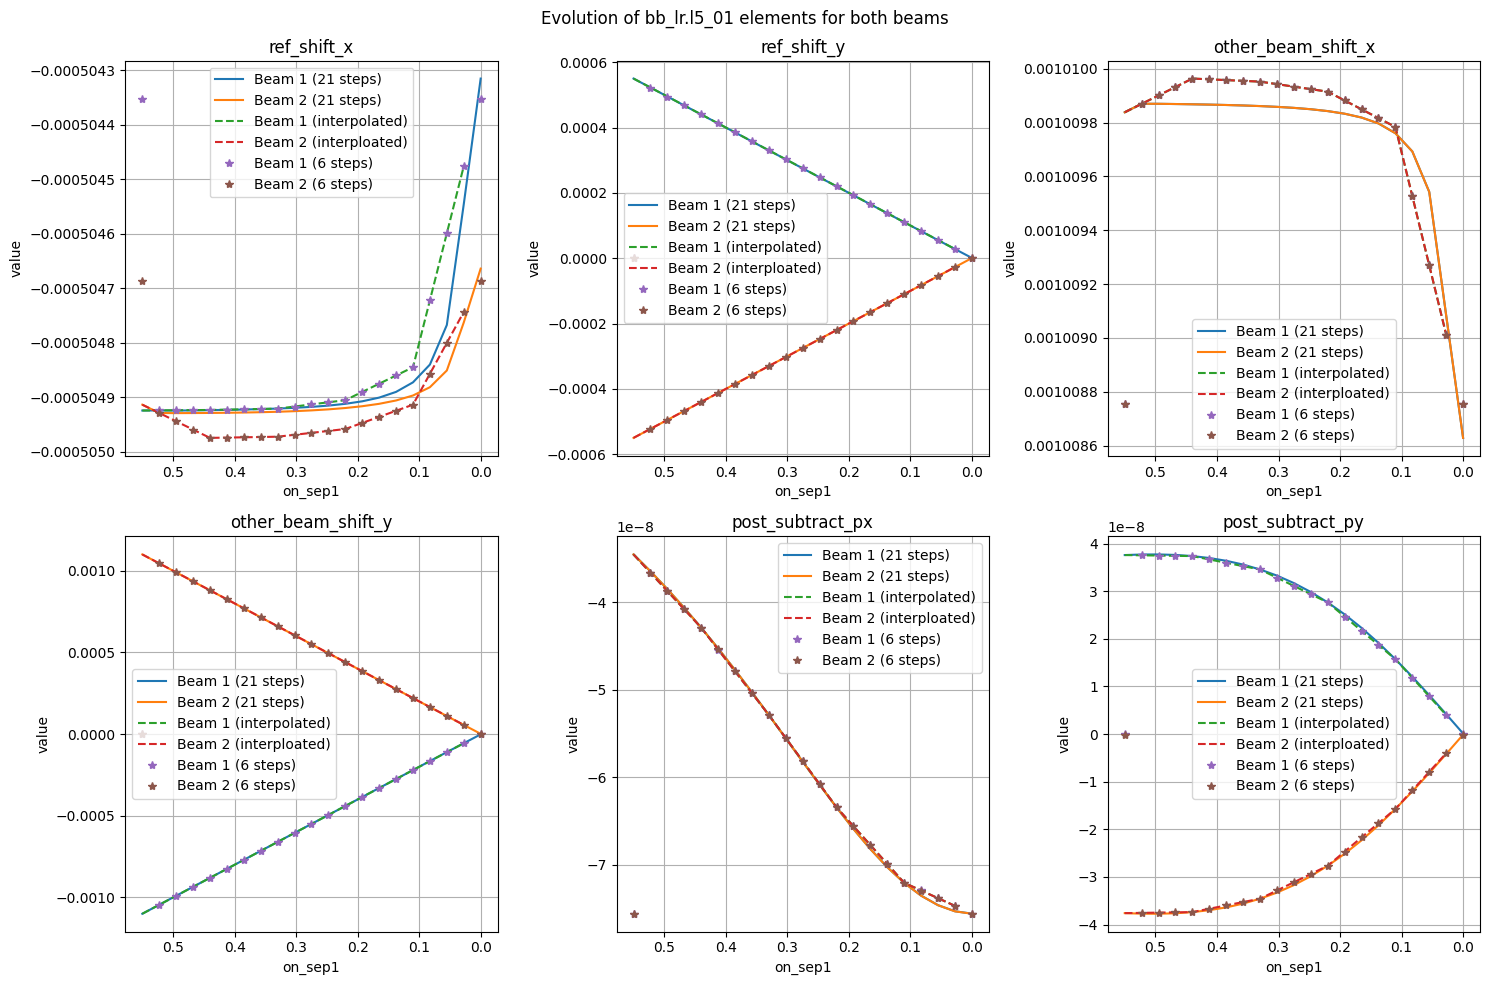

In [23]:

# Define two x-axis depending if 6 or 21 steps
on_sep1_21 = np.linspace(0.55,0,21, endpoint=True)
on_sep1_6 = np.linspace(0.55,0,6, endpoint=True)

# Make a plot for each element (6 elements in total, 3*3 subplots)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, element in enumerate(l_elements_of_interest_21_true):
    # 21 steps 
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b1_21_true[i], label='Beam 1 (21 steps)')
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b2_21_true[i], label='Beam 2 (21 steps)')
    
    # 6 steps
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b1_6_true[i], label='Beam 1 (21 steps)')
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b2_6_true[i], label='Beam 2 (21 steps)')

    # 6 steps with reset
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b1_6_reset[i], label='Beam 1 (6 steps with reset)')
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b2_6_reset[i], label='Beam 2 (6 steps with reset)')

    # 6 steps with static ip 1
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b1_6_static[i], label='Beam 1 (6 steps with static ip 1)')
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b2_6_static[i], label='Beam 2 (6 steps with static ip 1)')

    # 21 steps with static ip 1
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b1_21_static[i], label='Beam 1 (21 steps with static ip 1)')
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b2_21_static[i], label='Beam 2 (21 steps with static ip 1)')

    axs[i//3, i%3].grid()
    axs[i//3, i%3].set_xlabel("on_sep1")
    axs[i//3, i%3].invert_xaxis()
    axs[i//3, i%3].set_ylabel("value")
    axs[i//3, i%3].set_title(element)
    axs[i//3, i%3].legend()

plt.suptitle("Evolution of bb_lr.l5_01 elements for both beams")
plt.tight_layout()
plt.show()
